In [1]:
import scanpy as sc
import pandas as pd
# Read 10x dataset
adata = sc.read_10x_h5("/Users/cmdb/qbb2020-answers/Quant_lab/assignment_08/neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

# Step 1: Filtering

In [3]:
prefiltered = adata

# PCA plotting before filtering

In [4]:
sc.tl.pca(prefiltered)
#prefiltered_PCA = sc.tl.pca(prefiltered, copy=True)
#prefiltered_PCA

... storing 'feature_types' as categorical
... storing 'genome' as categorical


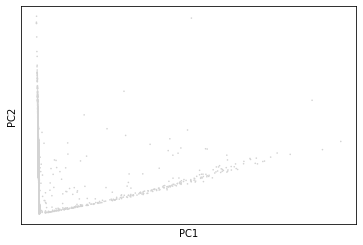

In [5]:
sc.pl.pca(prefiltered)

# Filtering and PCA

In [6]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [7]:
sc.pp.recipe_zheng17(adata)
#filtered_data = sc.pp.recipe_zheng17(adata, copy=True)
#filtered_data

In [8]:
sc.tl.pca(adata)
#filtered_PCA = sc.tl.pca(filtered_data, copy=True)
#filtered_PCA

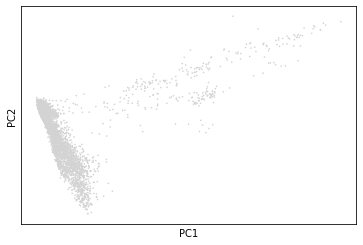

In [9]:
#sc.pl.pca(filtered_PCA)
sc.pl.pca(adata)

# Step 2: Clustering

In [10]:
#filtered_data

In [11]:
sc.pp.neighbors(adata)
#neighbors = sc.pp.neighbors(filtered_data, copy = True)
#neighbors = sc.pp.neighbors(filtered_data, use_rep = 'X', copy = True)
#sc.pp.neighbors(filtered_data)
sc.tl.leiden(adata)
#clusters = sc.tl.leiden(neighbors, copy = True)

# t-SNE

In [12]:
sc.tl.tsne(adata, n_pcs=50, use_fast_tsne=True)
#sc.tl.tsne(adata, n_pcs=50, use_fast_tsne=True)

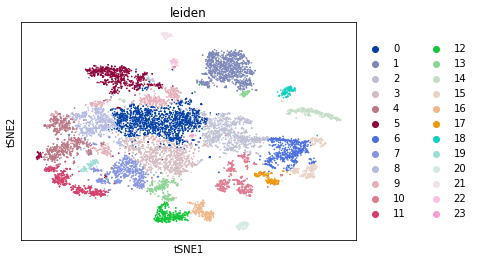

In [13]:
sc.pl.tsne(adata, color='leiden')
#sc.pl.tsne(clusters)

# UMAP

In [14]:
sc.tl.umap(adata)

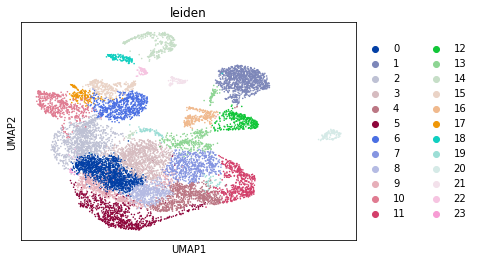

In [15]:
sc.pl.umap(adata, color='leiden')

# Step 3: Distinguishing Genes

In [16]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'leiden_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [17]:
adata.var

,gene_ids,feature_types,genome,n_counts,mean,std
Sox17,ENSMUSG00000025902,Gene Expression,mm10,331.0,0.007345,0.101310
Oprk1,ENSMUSG00000025905,Gene Expression,mm10,8.0,0.000618,0.026965
Ptpn18,ENSMUSG00000026126,Gene Expression,mm10,406.0,0.012045,0.116127
1500015O10Rik,ENSMUSG00000026051,Gene Expression,mm10,3197.0,0.080067,0.339471
Col3a1,ENSMUSG00000026043,Gene Expression,mm10,306.0,0.006266,0.097780
...,...,...,...,...,...,...
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10,32491.0,1.083314,0.687373
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,280706.0,3.015185,0.735251
mt-Cytb,ENSMUSG00000064370,Gene Expression,mm10,745348.0,3.957842,0.782318
AC149090.1,ENSMUSG00000095041,Gene Expression,mm10,4719.0,0.226564,0.432205


In [18]:
genes = adata.var.index.tolist()
genes

['Sox17',
 'Oprk1',
 'Ptpn18',
 '1500015O10Rik',
 'Col3a1',
 'Slc40a1',
 'Gm28826',
 'Cavin2',
 'Gm553',
 'Nrp2',
 'Gm4208',
 'Erbb4',
 'Gm29113',
 'Fn1',
 'Igfbp5',
 'Rufy4',
 'Vil1',
 'Wnt6',
 'Serpine2',
 'G530012D18Rik',
 'Sp110',
 'Sp140',
 'Ptma',
 'Prss56',
 'Inpp5d',
 'Ugt1a6a',
 'Glrp1',
 'Ackr3',
 'Gm29480',
 'Bcl2',
 'Serpinb5',
 'Dbi',
 'Gm29427',
 'Gm28892',
 'Rgs18',
 'Ncf2',
 'Sec16b',
 'F5',
 'Ildr2',
 'Rxrg',
 'Rgs5',
 'Rgs4',
 'Fcgr3',
 'Nr1i3',
 'Fcer1g',
 'Arhgap30',
 'F11r',
 'Pea15a',
 'Gm17224',
 'Atp1a2',
 'Tagln2',
 'Ifi204',
 'Gm16564',
 'H3f3a',
 'C130074G19Rik',
 'Cenpf',
 'Prox1',
 'Atf3',
 'Gm15872',
 'Cd34',
 'Gm13184',
 'Celf2',
 'Itih5',
 'Vim',
 'Gad2',
 'Nxph2',
 'Tor4a',
 'Fam166a',
 'Fcna',
 'Notch1',
 'Egfl7',
 'Adamtsl2',
 'Qrfp',
 'Eng',
 'Pbx3',
 'Lhx6',
 'Gm13431',
 'Ptgs1',
 'Olfr366',
 'Zeb2',
 'Gm13490',
 'Neb',
 'Gm13522',
 'Rprm',
 'Nr4a2',
 'Ly75',
 'Nostrin',
 'Spc25',
 'Gad1',
 'Dlx1',
 'Dlx2',
 'Sp9',
 '4930440I19Rik',
 'Ube2l6',
 'Apl

In [20]:
import copy
sorted_genes = copy.deepcopy(genes)
sorted_genes.sort()
sorted_genes

['0610033M10Rik',
 '1500015O10Rik',
 '1700003F12Rik',
 '1700010G06Rik',
 '1700021A07Rik',
 '1700047G03Rik',
 '1700060O08Rik',
 '1700092M07Rik',
 '1700125G22Rik',
 '2010005H15Rik',
 '2010110E17Rik',
 '2200002D01Rik',
 '2310031A07Rik',
 '2410021H03Rik',
 '2810432F15Rik',
 '4921508D12Rik',
 '4921514A10Rik',
 '4930428O21Rik',
 '4930440I19Rik',
 '4930455J16Rik',
 '4930484H19Rik',
 '4930509J09Rik',
 '4930557F10Rik',
 '4932702P03Rik',
 '4933400C23Rik',
 '4933405O20Rik',
 '4933406B17Rik',
 '4933406J10Rik',
 '4933408J17Rik',
 '4933408N05Rik',
 '5430427O19Rik',
 '6330410L21Rik',
 '6430628N08Rik',
 '8430408G22Rik',
 'A730046J19Rik',
 'A930014E10Rik',
 'AC149090.1',
 'AC164881.1',
 'AL589670.3',
 'AL589670.4',
 'AL590144.2',
 'AU021092',
 'Abca1',
 'Abca8a',
 'Abcc9',
 'Ace2',
 'Ackr3',
 'Actb',
 'Actg1',
 'Adamts10',
 'Adamts18',
 'Adamtsl2',
 'Adarb2',
 'Adcy1',
 'Adgre5',
 'Adgrf4',
 'Adgrl4',
 'Adm',
 'Adora2a',
 'Agbl2',
 'Agrn',
 'Ahnak',
 'Aicda',
 'Aif1',
 'Alas2',
 'Aldh1a3',
 'Aldh1l1',


In [44]:
gene = 'Sox2'
if gene in genes:
    print(gene, 'is in genes')
else:
    print(gene, 'is NOT in list')

Sox2 is in genes


In [22]:
gene = 'Sox'
for entry in genes:
    if gene in entry:
        print(entry)
        break

Sox17


In [23]:
'Sox' in 'Sox2'

True

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


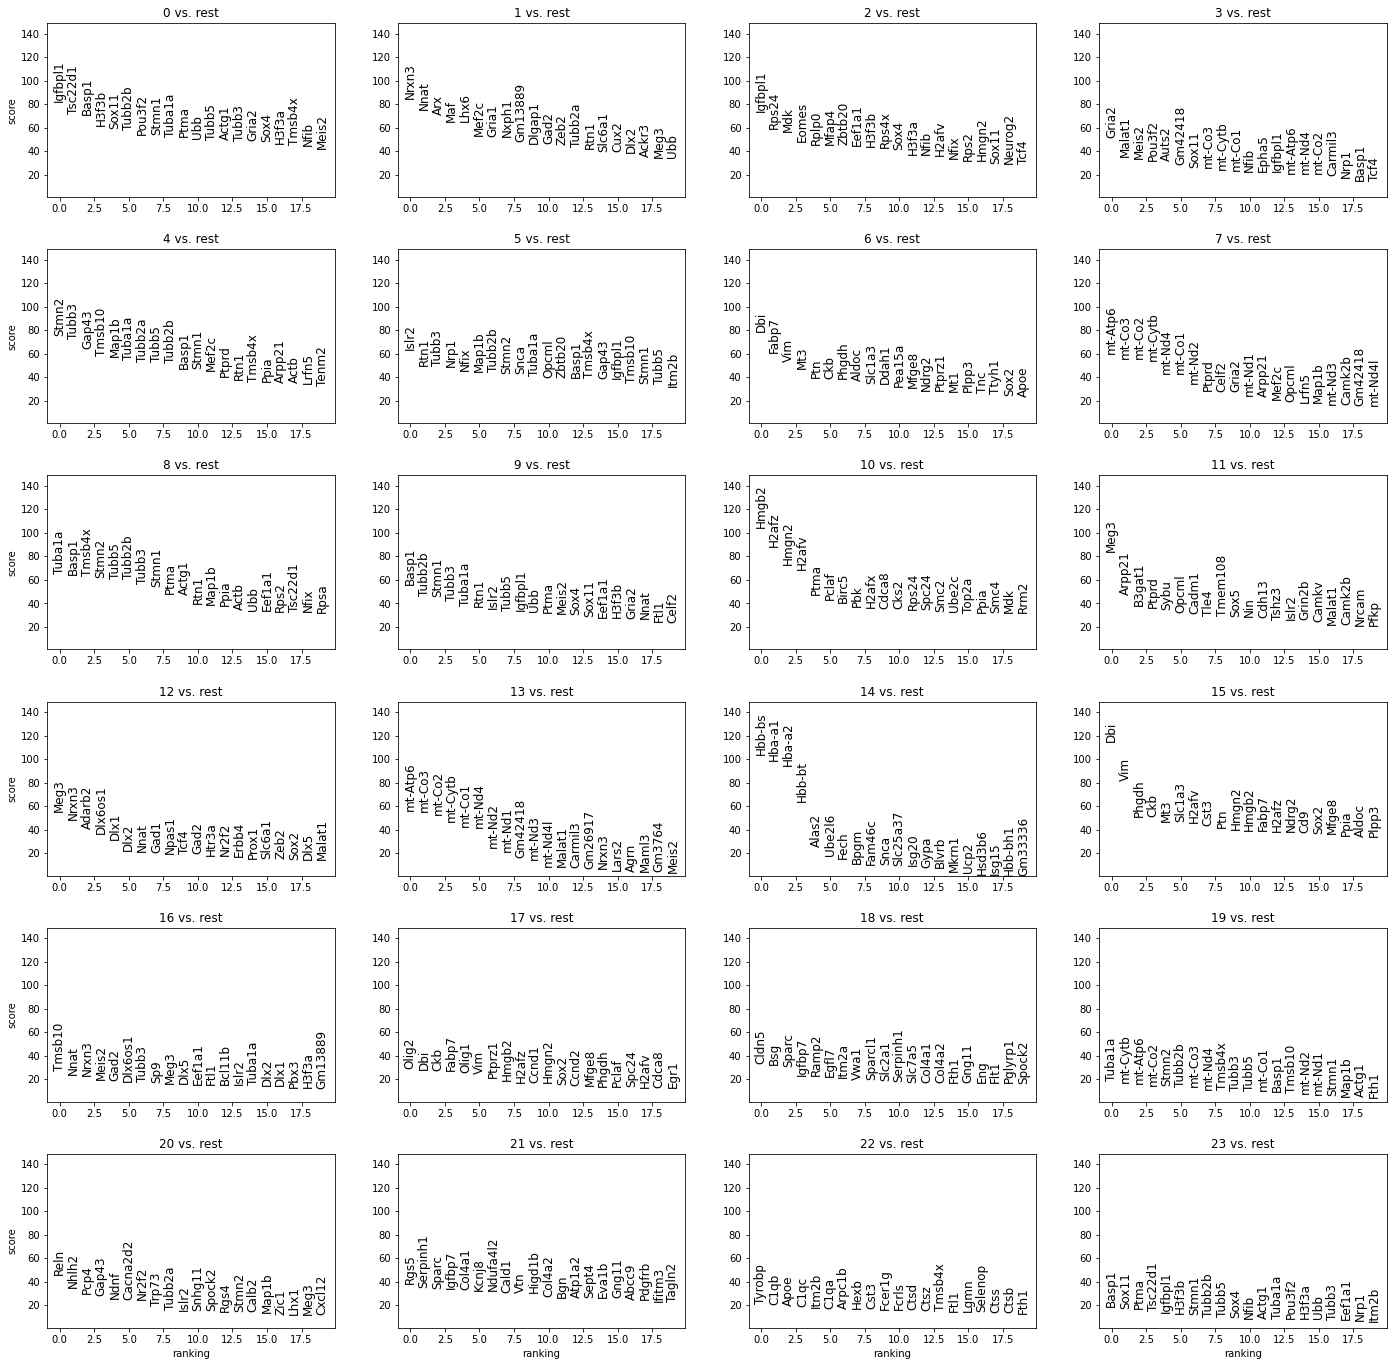

In [25]:
sc.pl.rank_genes_groups(adata, fontsize=12)

In [26]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


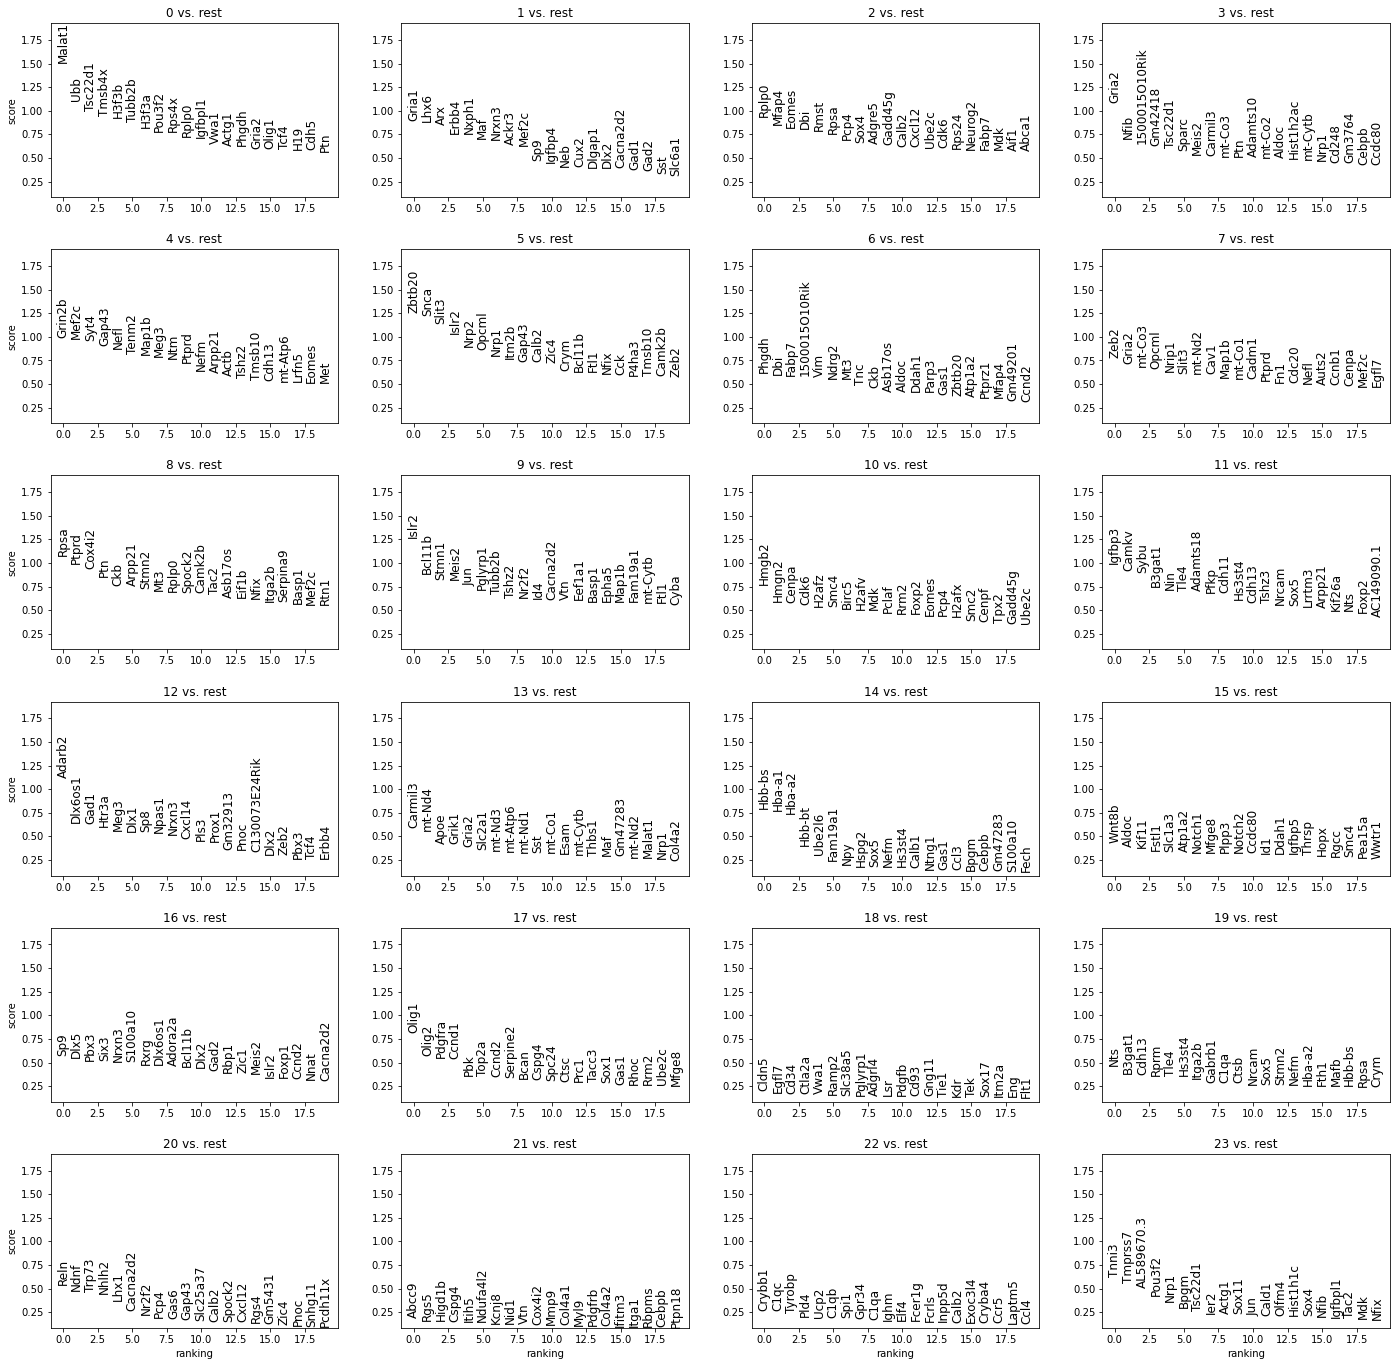

In [27]:
sc.pl.rank_genes_groups(adata, fontsize=12)

# Step 4: Cell types

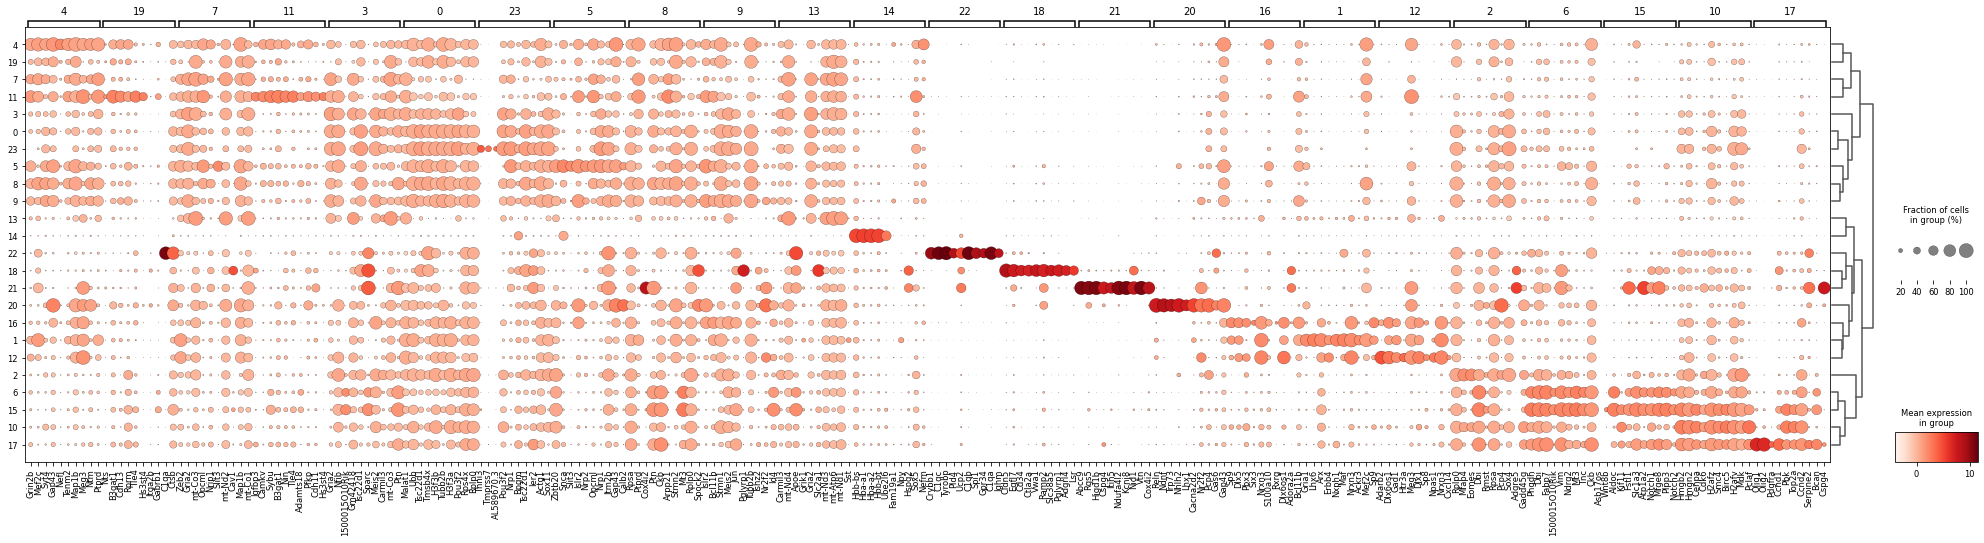

In [28]:
sc.pl.rank_genes_groups_dotplot(adata, figsize=(35,8), save='dotplot.pdf')

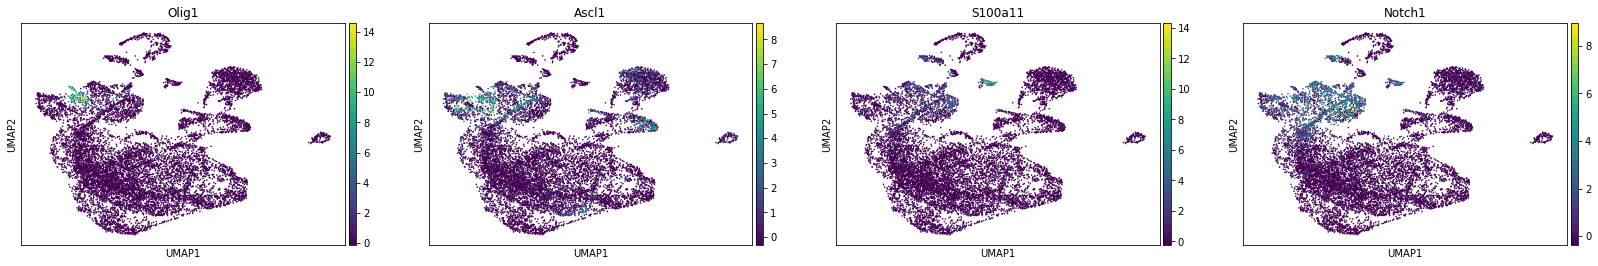

In [29]:
#sc.pl.umap(adata, color=['Olig1', 'Sox2', 'Ascl1', 'S100a11', 'Notch1'])
sc.pl.umap(adata, color=['Olig1', 'Ascl1', 'S100a11', 'Notch1'])

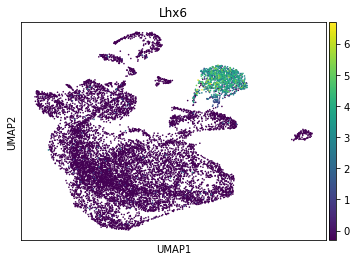

In [43]:
sc.pl.umap(adata, color=['Lhx6'])
#cluster 1, migrating interneurons?

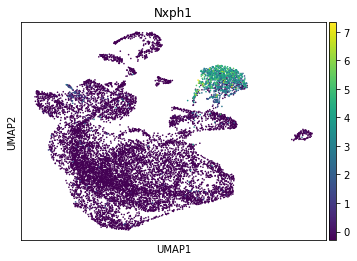

In [52]:
sc.pl.umap(adata, color=['Nxph1'])
#cluster 1, migrating interneurons? Inhibitory neurons?

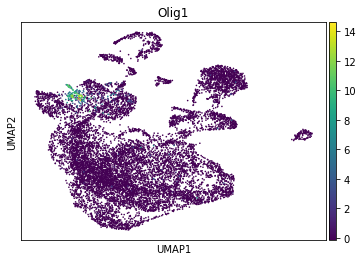

In [30]:
sc.pl.umap(adata, color=['Olig1'])
#oligodendrocyte cell marker, cluster 17

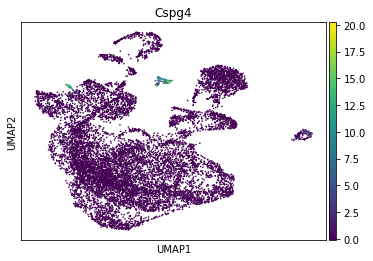

In [46]:
sc.pl.umap(adata, color=['Cspg4'])
#cluster 21, oligodendrocyte precursor/endothelium?

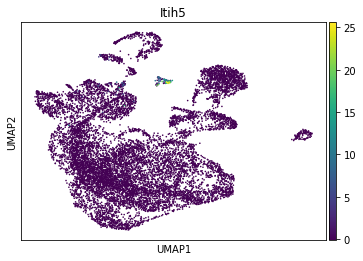

In [53]:
sc.pl.umap(adata, color=['Itih5'])
#cluster 21, oligodendrocyte precursor/endothelium?

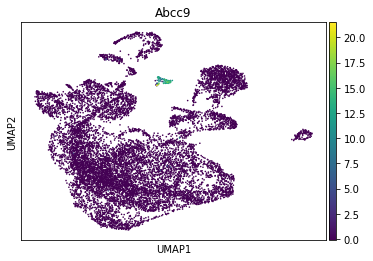

In [55]:
sc.pl.umap(adata, color=['Abcc9'])
#cluster 21, oligodendrocyte precursor/endothelium?

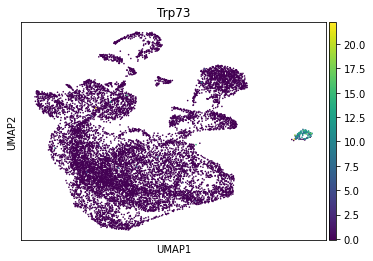

In [31]:
sc.pl.umap(adata, color=['Trp73'])
#cluster 20, radial glia/ependymal cells?

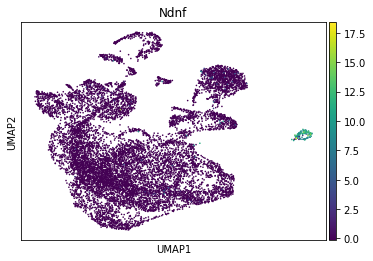

In [56]:
sc.pl.umap(adata, color=['Ndnf'])
#cluster 20, radial glia/ependymal cells?

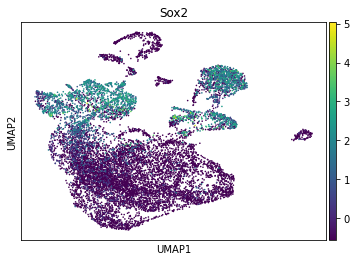

In [45]:
sc.pl.umap(adata, color=['Sox2'])
#cluster 20, radial glia/ependymal cells?

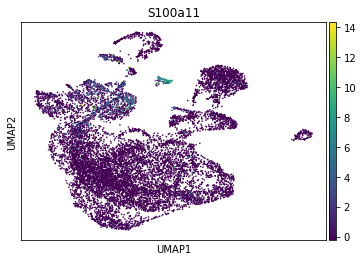

In [32]:
sc.pl.umap(adata, color=['S100a11'])
#Schwann cell marker, cluster 21

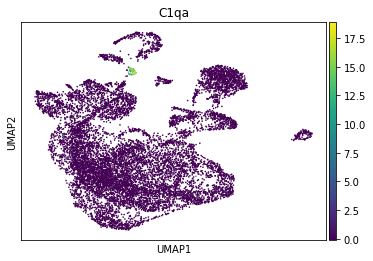

In [33]:
sc.pl.umap(adata, color=['C1qa'])
#cluster 22, microglia

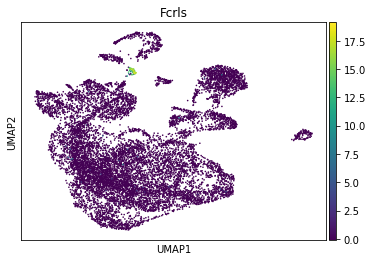

In [38]:
sc.pl.umap(adata, color=['Fcrls'])
#cluster 22, microglia CONFIRMED

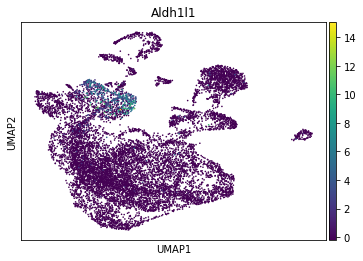

In [47]:
sc.pl.umap(adata, color=['Aldh1l1'])
#cluster astrocytes?

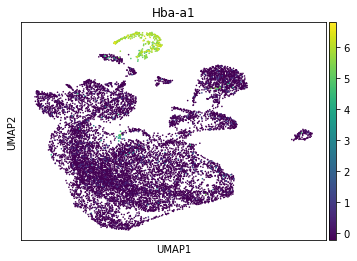

In [34]:
sc.pl.umap(adata, color=['Hba-a1'])
#cluster 14

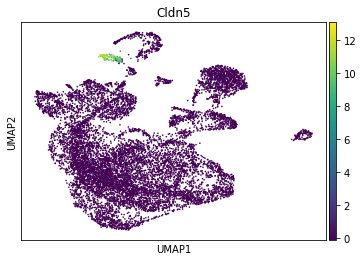

In [35]:
sc.pl.umap(adata, color=['Cldn5'])
#cluster 18, neutrophil?

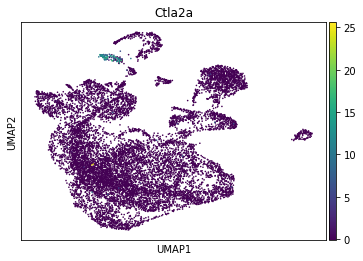

In [57]:
sc.pl.umap(adata, color=['Ctla2a'])
#cluster 18, neutrophil?

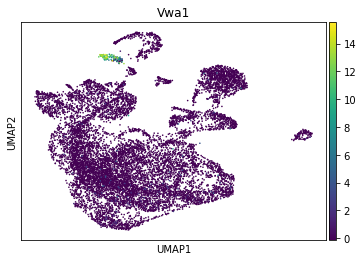

In [58]:
sc.pl.umap(adata, color=['Vwa1'])
#cluster 18, neutrophil?

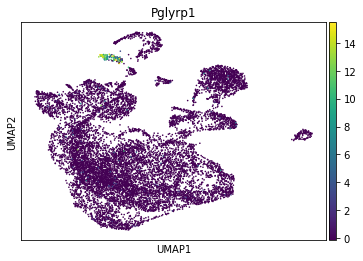

In [59]:
sc.pl.umap(adata, color=['Pglyrp1'])
#cluster 18, neutrophils?

# Annotated UMAP

In [71]:
adata

AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'leiden_colors', 'umap', 'rank_genes_groups', "dendrogram_['leiden']"
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [74]:
new_cluster_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 'Oligodendrocytes', '18', '19', '20', 'Schwann cells', 'Microglia', '23']

In [75]:
adata.rename_categories('leiden', new_cluster_names)

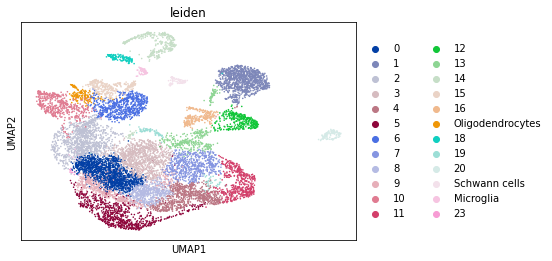

In [76]:
sc.pl.umap(adata, color='leiden')